In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import curve_fit

In [4]:
read_data = pd.read_excel("sodium_batteries.xlsx", skiprows=1)

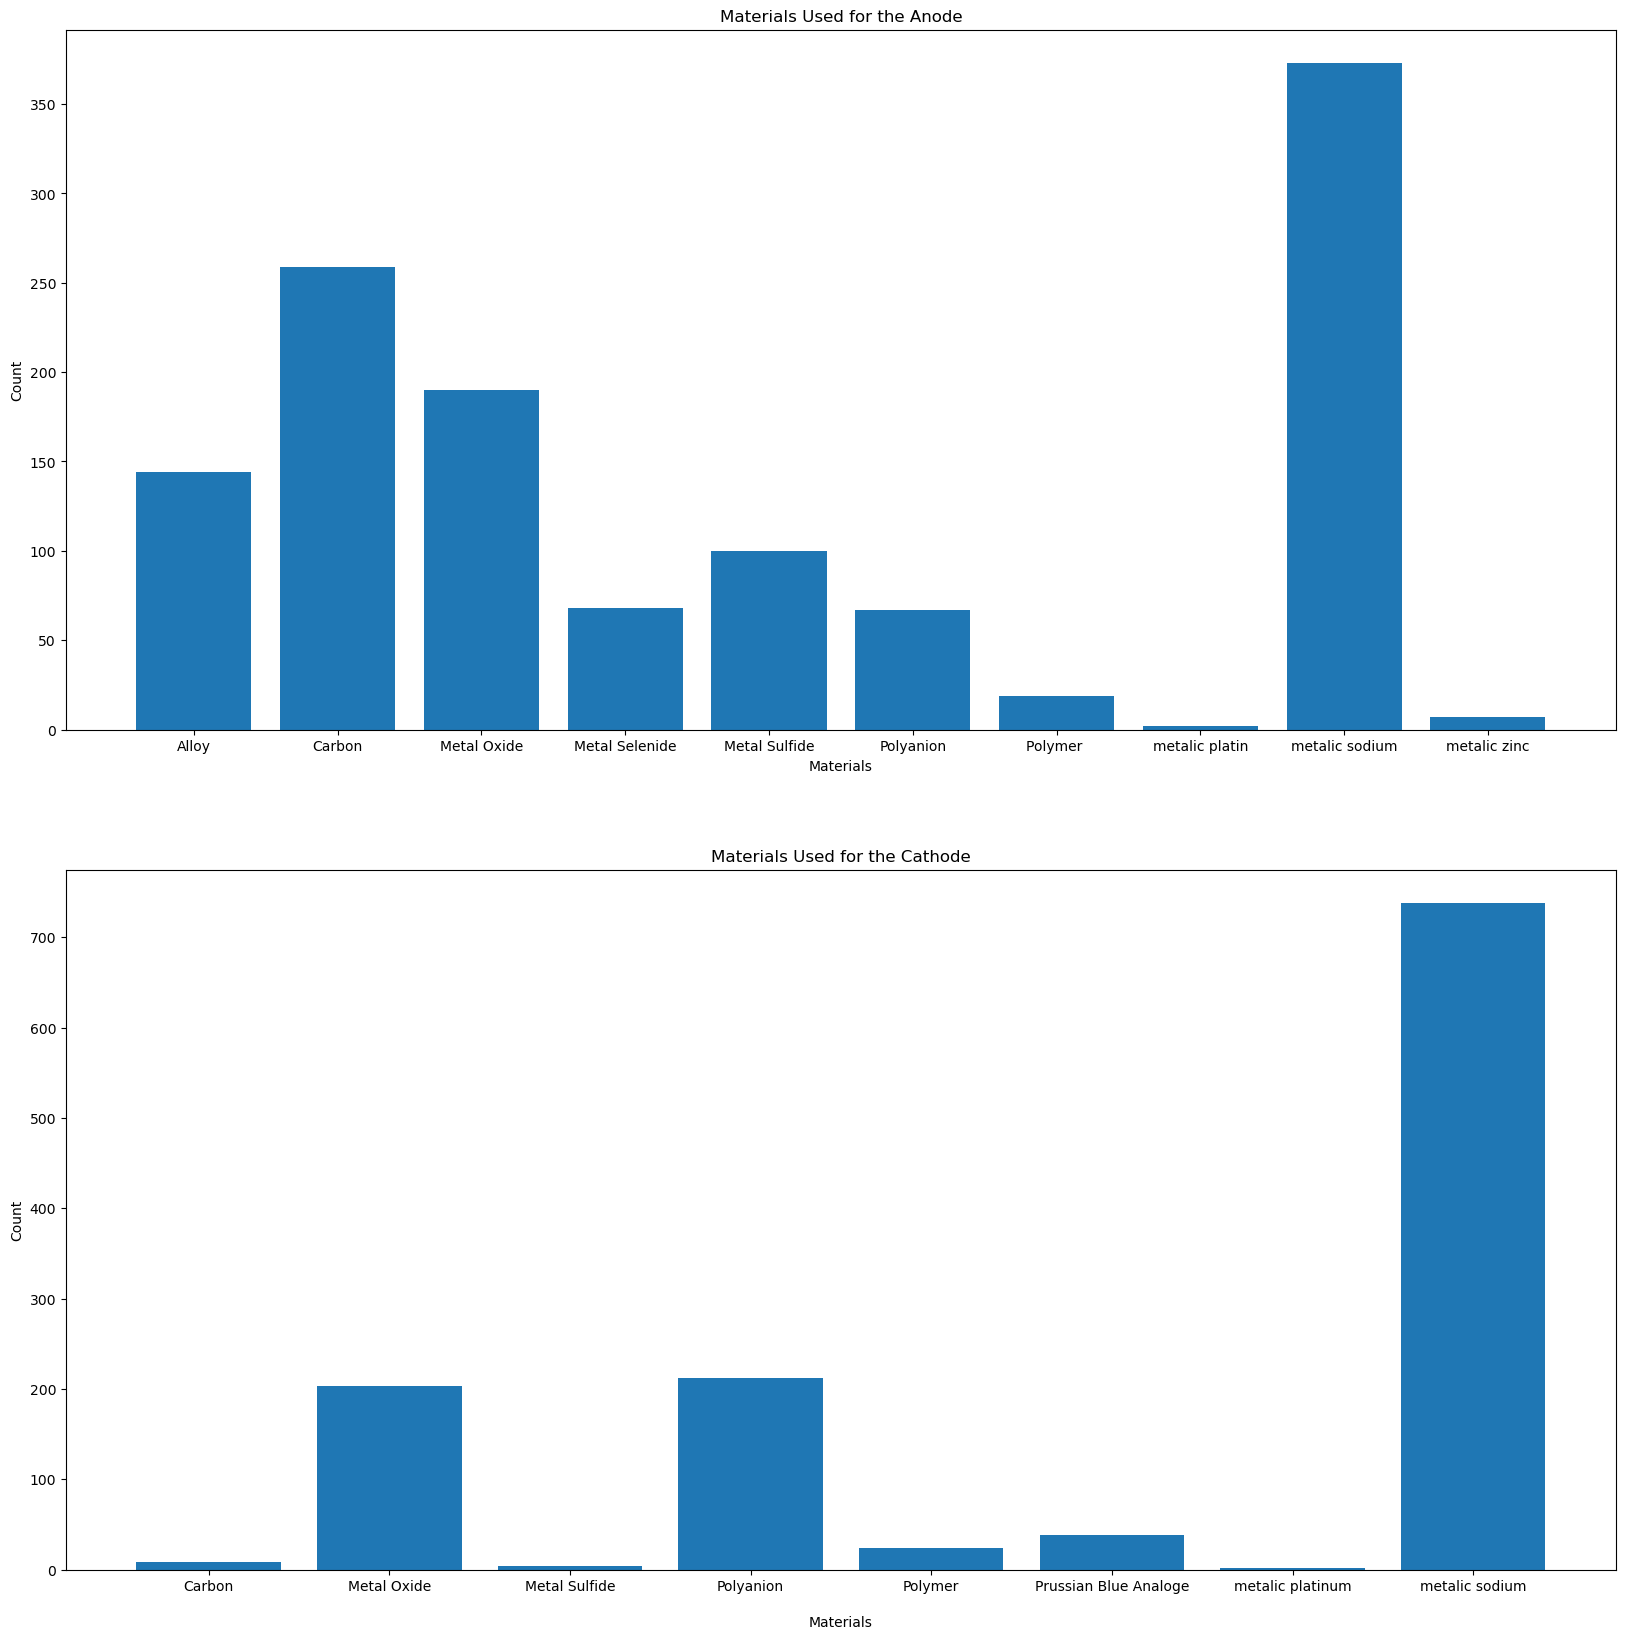

In [13]:
anode_group = read_data["Anode.Group"]
cathode_group = read_data["Cathode.Group"]
cathode_group_count = read_data.groupby("Cathode.Group").size()
anode_group_count = read_data.groupby("Anode.Group").size()

counts_cathode = []
counts_anode = []
anode_group_labels = anode_group_count.index
cathode_group_labels = cathode_group_count.index

for individual_counts in anode_group_count:
    counts_anode.append(individual_counts)

for individual_counts in cathode_group_count:
    counts_cathode.append(individual_counts)


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 20))


ax1.bar(anode_group_labels, counts_anode)
ax1.set_title("Materials Used for the Anode")
ax1.set_xlabel("Materials")
ax1.set_ylabel("Count")


ax2.bar(cathode_group_labels, counts_cathode)
ax2.set_title("Materials Used for the Cathode")
ax2.set_xlabel("Materials")
ax2.set_ylabel("Count")
plt.savefig("Anode and Ca.png")

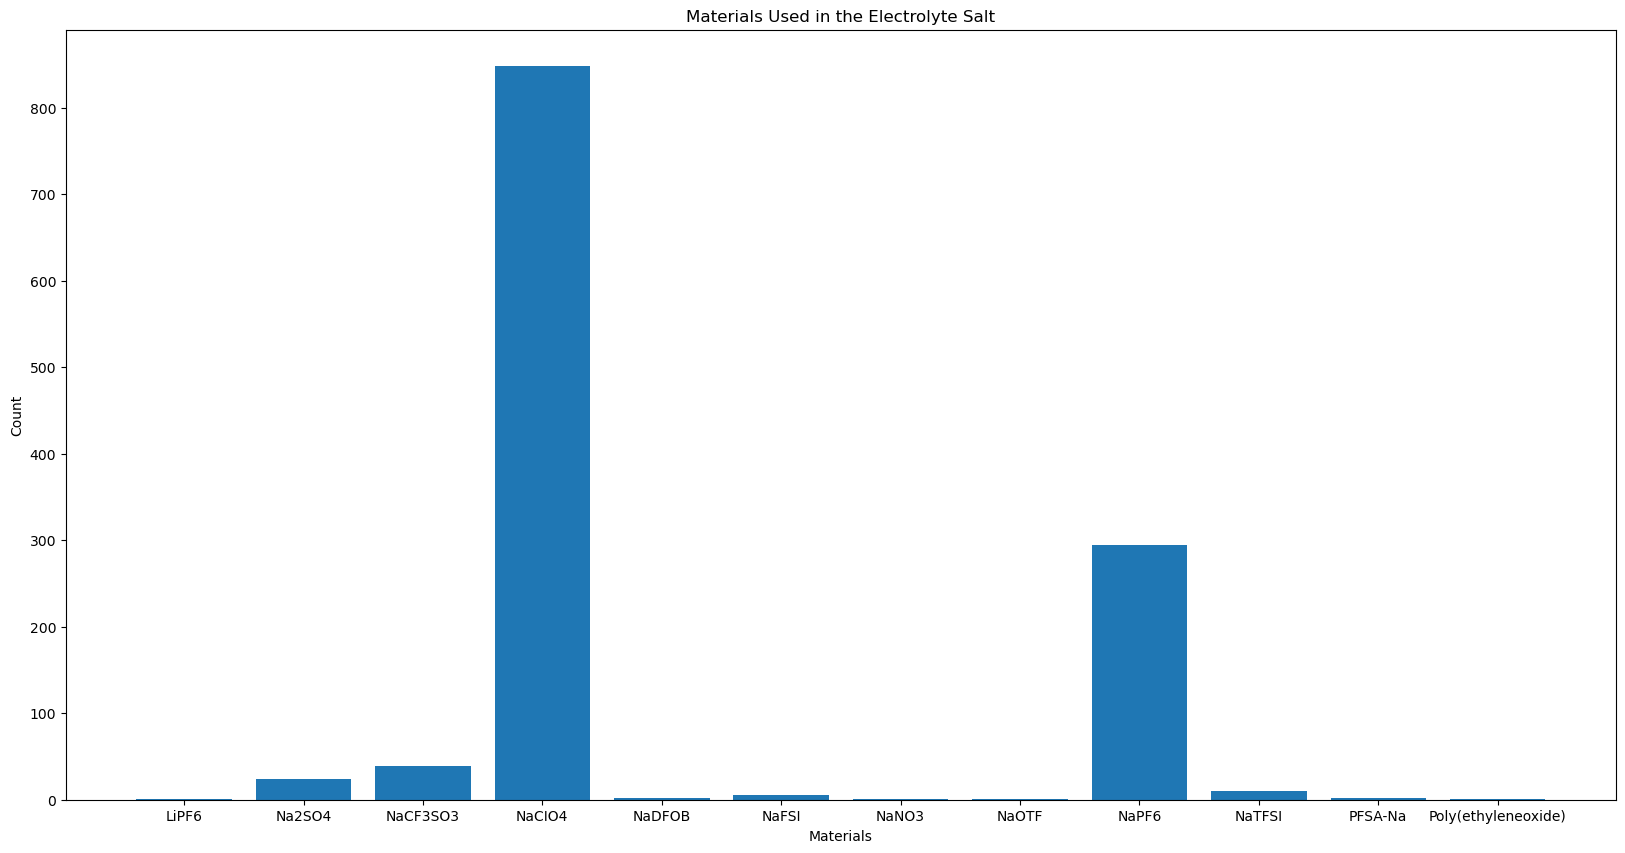

In [14]:
electrolyte_salt = read_data["Salt"]
counts_electrolyte = []
electrolyte_salt_count = read_data.groupby("Salt").size()
salt_group_labels = electrolyte_salt_count.index

for individual_counts in electrolyte_salt_count:
    counts_electrolyte.append(individual_counts)
    
plt.figure(figsize=(20,10))
plt.bar(salt_group_labels, counts_electrolyte)
plt.title("Materials Used in the Electrolyte Salt")
plt.xlabel("Materials")
plt.ylabel("Count")
plt.savefig("Electrolyte_Salt.png")


# Plot the crystal structures for cathode and anode

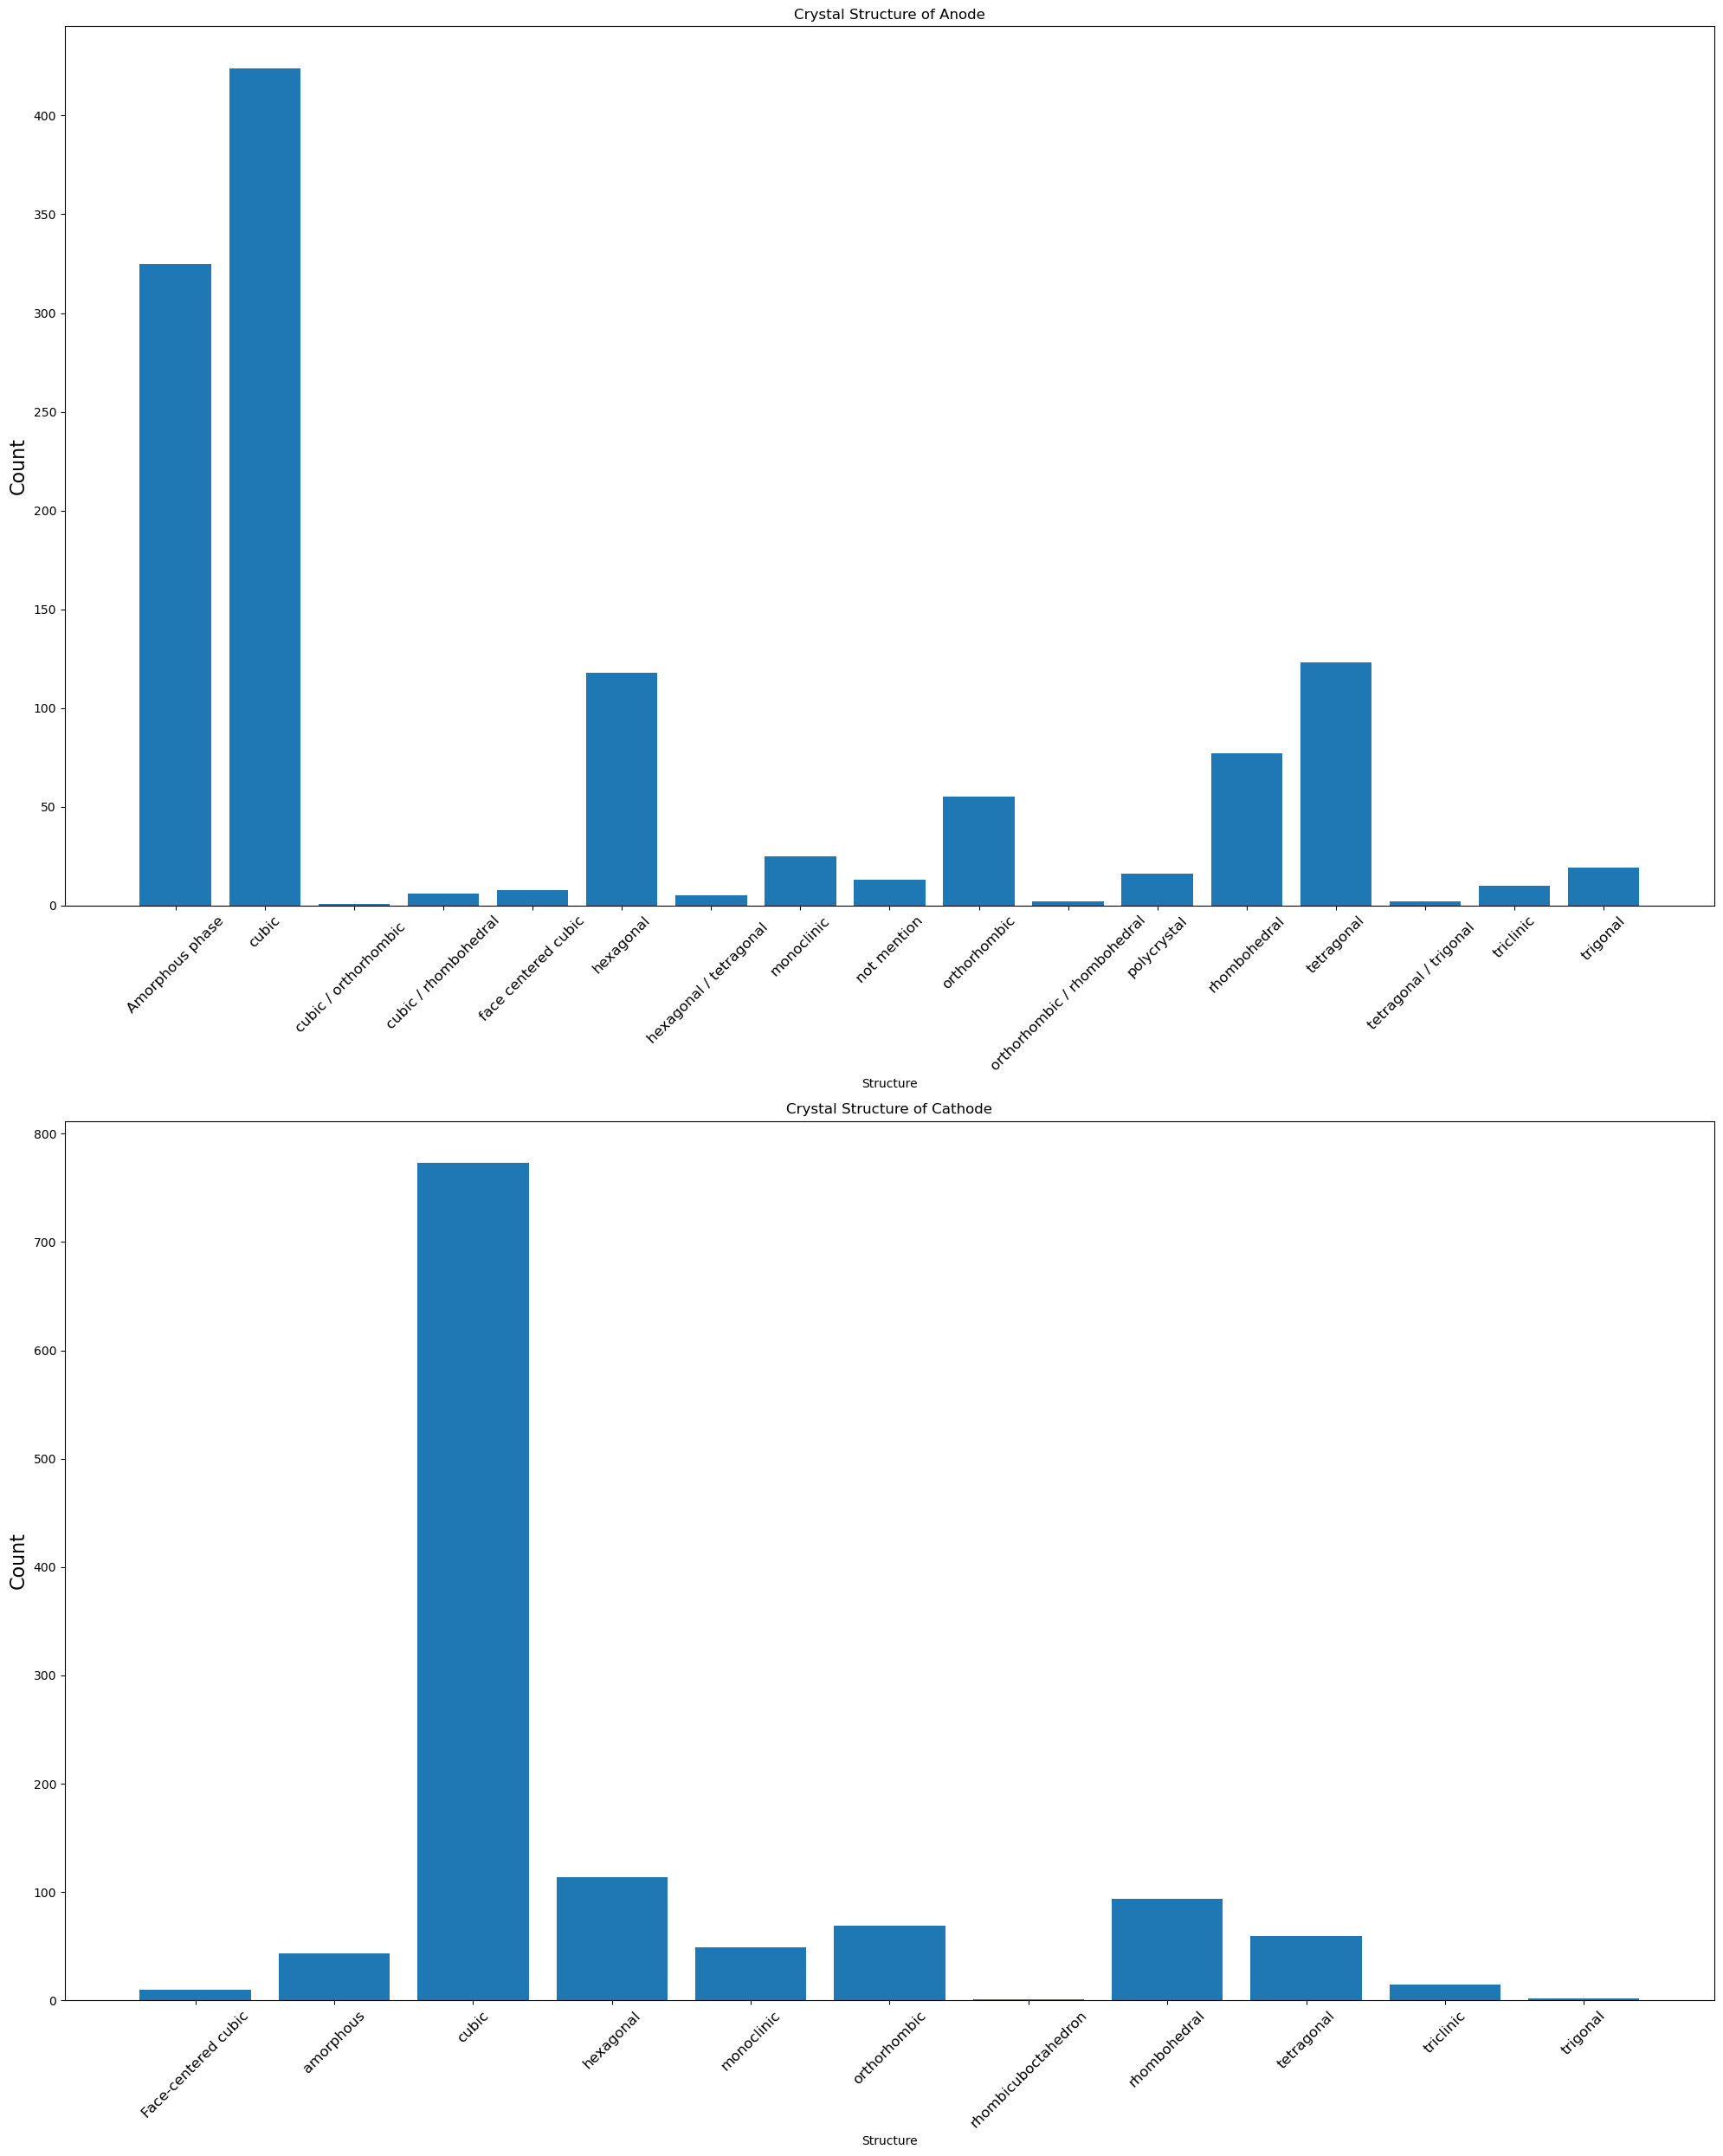

In [20]:
import matplotlib.pyplot as plt



# Counts by group
anode_structure_count = read_data.groupby("Anode.Crystal Structure").size()
cathode_structure_count = read_data.groupby("Cathode.Crystal").size()

counts_anode_structure = list(anode_structure_count)
counts_cathode_structure = list(cathode_structure_count)

anode_labels = anode_structure_count.index
cathode_labels = cathode_structure_count.index

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 25))

# Plotting Anode Structure Counts
ax1.bar(anode_labels, counts_anode_structure)
ax1.set_title("Crystal Structure of Anode")
ax1.set_xlabel("Structure")
ax1.set_ylabel("Count", fontsize = 16)
ax1.tick_params(axis='x', labelrotation=45, labelsize=12)  # Rotate and increase font size

# Plotting Cathode Structure Counts
ax2.bar(cathode_labels, counts_cathode_structure)
ax2.set_title("Crystal Structure of Cathode")
ax2.set_xlabel("Structure")
ax2.set_ylabel("Count", fontsize=16)
ax2.tick_params(axis='x', labelrotation=45, labelsize=12)  # Rotate and increase font size

# Save the figure
plt.tight_layout()  # Adjust layout to make room for label rotation
plt.savefig("Anode and Cathode Crystal Structures.png")

In [5]:
retention_cycle_num = read_data["peak discharge capacity retention (%80) cycle number"]
numeric_data = pd.to_numeric(retention_cycle_num, errors='coerce')


for i in range(len(numeric_data)):
    if isinstance(retention_cycle_num[i], str) and '+' in retention_cycle_num[i]:
        numeric_data[i] = float(retention_cycle_num[i].replace('+', ''))

threshold = 10000
outliers = numeric_data[numeric_data > threshold]
# print(outliers)

peak_discharge_capacity = read_data["peak discharge capacity. (mAh/g)"]
peak_discharge_np = peak_discharge_capacity.to_numpy()
peak_discharge_np = np.delete(peak_discharge_np, outliers.index)

read_data["peak discharge capacity retention (%80) cycle number"] = numeric_data
retention_np = np.array(numeric_data)
retention_np = np.delete(retention_np, outliers.index)

read_data.to_excel('file.xlsx', index=False)
